In [470]:
import numpy as np
from sklearn.linear_model import LogisticRegression , LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits , load_iris
import seaborn as sns
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score as cs
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from termcolor import colored

def read(filname):
    fullfilename = filname + ".csv"
    return pd.read_csv(str(fullfilename))

### Load CSV

In [436]:
d = read('spam')
d

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<AxesSubplot:>

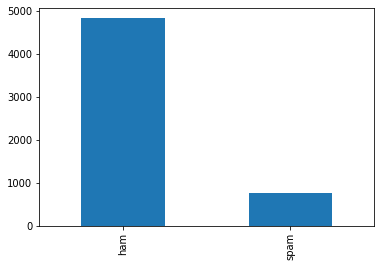

In [437]:
d.Category.value_counts().plot(kind='bar')

## Cleaning Data


In [438]:
le = LabelEncoder()
d['spam'] = le.fit_transform(d.Category)


In [439]:
d = d.drop('Category' , axis = 1)
d


,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


## Splitting the Data


In [444]:
xtrain ,xtest ,ytrain ,ytest = train_test_split(d.Message , d.spam)
xtrain.shape , xtest.shape

((4179,), (1393,))

## Using Count Vectorizer to change text to binary


In [441]:
d.Message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [445]:
v = CountVectorizer()
message = v.fit_transform(xtrain)
message.toarray()[:4]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [446]:
model = MultinomialNB()
model.fit(message , ytrain)

MultinomialNB()

In [480]:
emails = [
    'join our 20 percent off',
    'shadeer is the best player',
    'hi hello man i am her',
    'We hope you participated in the last Quantra Weekly Session on Options Trading Strategies, and it proved useful for you by getting your doubts cleared. Live interaction with a faculty surely helps one to synthesise their learnings & helps fast pace their knowledge. ',
    'WIN Desygner Pro+ FREE for a year valued at US$59.40! To celebrate the launch of our new Mother’s Day templates, we are giving 5 people the opportunity to WIN a 1 year Desygner Pro+ account subscription*! ',
    gap,
    "How do I get back into my Instagram account if it keeps sending a security code to a deactivated number and I can't login to the account?",
    "hey yooo i am hacking yo",
    "press this link to win chance"
]
emails = [sents.strip() for sents in emails]
emails = v.transform(emails)
preds = model.predict(emails) 


In [482]:
for i in preds:
    if i == 1 :
        print(colored("Spam Email" , 'red'))
    else :
        print(colored("Clear Email" , 'green'))

Spam Email
Clear Email
Clear Email
Clear Email
Spam Email
Spam Email
Clear Email
Clear Email
Spam Email


In [473]:
model.score(v.transform(xtest),ytest)

0.9777458722182341